# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import requests
from scipy import stats

# Import API Key
from api_keys import weather_api_key

# Import Citipy module for random city generation
from citipy import citipy

## Generate Cities List

In [2]:
# Create empty list for holding city names and lat/long coordinates
city_names = []
latlongs = []

# Generate random latitude and longitude combinations before for loop
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
longs = np.random.uniform(low=-180.000, high=180.000, size=2000)

# Use zip to make an iterator for the for loop
latlongs = zip(lats, longs)

# Use for loop to iterate through latlongs, and find the nearest city
for latlong in latlongs:
    city = citipy.nearest_city(latlong[0], latlong[1]).city_name
    
    # Append to list of cities if unique (to avoid repeating cities)
    if city not in city_names:
        city_names.append(city)
        
# Check if there are sufficient cities (> 500)
len(city_names)

762

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Base URL and add units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Create the lists we will need to append to for the dataframe
cities = []
lat = []
long = []
maxtemp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Initialise counters
set_count = 1
record_count = 1


print("Beginning Data Retrieval")
print("-----------------------------")

# Loop through the city names and make the query url for each city - enumerate makes each item in city_names numerical, which is needed to get request the OpenWeatherAPI
for i, city in enumerate(city_names):
    
    # Use modulo to ensure that the records are printed in groups of 50's
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Make the query url
    query_url = url + "units=" + units + "&appid=" + weather_api_key + "&q=" + city
         
    # Get request the json
    response = requests.get(query_url).json()
    
    # Print the results 
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Increase record count for next loop
    record_count += 1
    
   # Append the necessary items to a list and add an exception for when a city can't be found
    try:       
        cities.append(response["name"])
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        maxtemp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        
    except:
        print("City not found. Skipping...")
        
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | severo-kurilsk
Processing Record 2 of Set 1 | berezovyy
Processing Record 3 of Set 1 | fort nelson
Processing Record 4 of Set 1 | tiksi
Processing Record 5 of Set 1 | hobart
Processing Record 6 of Set 1 | gumla
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | ribeira grande
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | tasiilaq
Processing Record 12 of Set 1 | sao joao da barra
Processing Record 13 of Set 1 | carikar
City not found. Skipping...
Processing Record 14 of Set 1 | shingu
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | half moon bay
Processing Record 17 of Set 1 | port elizabeth
Processing Record 18 of Set 1 | barkot
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | buraydah
Processing Record 21 of Set 1 | naron
Processing Record 22 of Set 1 | bluff
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Put the data into a dataframe
city_data_df = pd.DataFrame({
    "City": cities,
    "Lat": lat,
    "Lng": long,
    "Max Temp": maxtemp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
})

# Export the city data into a csv file
city_data_df.to_csv("output_data/cities.csv")

# Display the DataFrame
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Severo-Kuril'sk,50.68,156.12,50.38,86,99,17.85,RU,1601319875
1,Berezovyy,51.67,135.70,43.83,74,89,5.73,RU,1601319875
2,Fort Nelson,58.81,-122.70,46.40,81,75,2.35,CA,1601319876
3,Tiksi,71.69,128.87,30.88,93,0,20.31,RU,1601319876
4,Hobart,-42.88,147.33,46.40,87,90,3.60,AU,1601319713


In [5]:
# Inspect the data by using the describe function
city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,7.060000e+02
mean,20.092592,21.603513,65.926969,70.641643,52.216714,7.705680,1.601320e+09
std,33.002423,89.091223,17.473245,21.983241,39.939029,4.957137,1.455144e+02
min,-54.800000,-179.170000,14.310000,7.000000,0.000000,0.160000,1.601319e+09
25%,-6.955000,-56.135000,53.502500,61.000000,5.000000,4.075000,1.601320e+09
50%,22.940000,21.465000,69.440000,77.000000,58.500000,6.930000,1.601320e+09
75%,47.992500,102.445000,79.942500,87.000000,93.000000,10.290000,1.601320e+09
max,78.220000,179.320000,101.620000,100.000000,100.000000,28.860000,1.601320e+09


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# Find values of Q1 - 1.5 x IQR and Q3 + 1.5 x IQR by using the 75% (Q3) and 25% (Q1) values from the describe table above
IQR = 87-61
lower_lim = 55-IQR
upper_lim = 87+IQR

# Finding the index of the outliers 
index = city_data_df[(city_data_df["Humidity"] >= upper_lim)|(city_data_df["Humidity"] <= lower_lim)].index

# Drop the indexes of the outliers
clean_city_data_df = city_data_df.drop(index, inplace=False)

# Describe to check if it dropped the correct rows
clean_city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,6.450000e+02
mean,21.310217,25.457643,64.522078,75.328682,55.141085,7.624264,1.601320e+09
std,33.199292,90.164808,17.148782,16.440289,39.318064,4.908274,1.445478e+02
min,-54.800000,-179.170000,14.310000,30.000000,0.000000,0.160000,1.601319e+09
25%,-5.200000,-53.460000,51.460000,67.000000,12.000000,4.000000,1.601320e+09
50%,25.020000,26.740000,68.000000,78.000000,74.000000,6.710000,1.601320e+09
75%,50.240000,111.500000,78.800000,87.000000,97.000000,10.290000,1.601320e+09
max,78.220000,179.320000,98.040000,100.000000,100.000000,27.250000,1.601320e+09


In [8]:
# Display the cleaned data frame
clean_city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Severo-Kuril'sk,50.68,156.12,50.38,86,99,17.85,RU,1601319875
1,Berezovyy,51.67,135.70,43.83,74,89,5.73,RU,1601319875
2,Fort Nelson,58.81,-122.70,46.40,81,75,2.35,CA,1601319876
3,Tiksi,71.69,128.87,30.88,93,0,20.31,RU,1601319876
4,Hobart,-42.88,147.33,46.40,87,90,3.60,AU,1601319713


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.


## Latitude vs. Temperature Plot

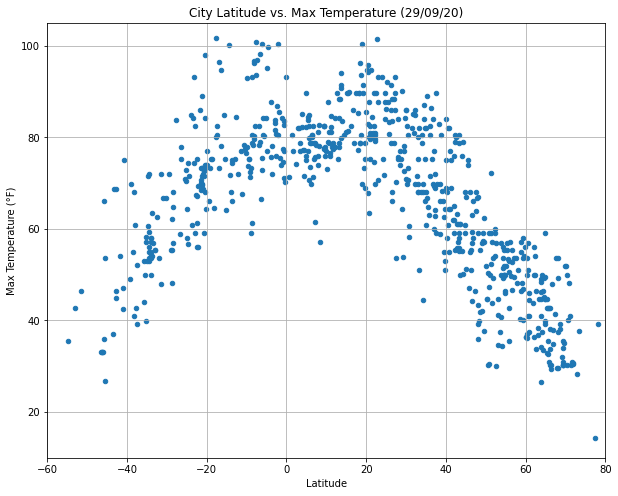

In [46]:
%matplotlib inline
city_data_df.plot.scatter(x="Lat", y="Max Temp", xlim=(-60, 80), ylim=(10,105), grid=True, title="City Latitude vs. Max Temperature (29/09/20)", figsize=(10,8))

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.savefig("output_data/LatvsMaxTemp.png")
plt.show()

The above figure plots City Latitude vs Maximum Temperature. It shows us that on the 29/09, when the city is closer to the equator (closer to a latitude of 0), the maximum temperature is generally higher.

## Latitude vs. Humidity Plot

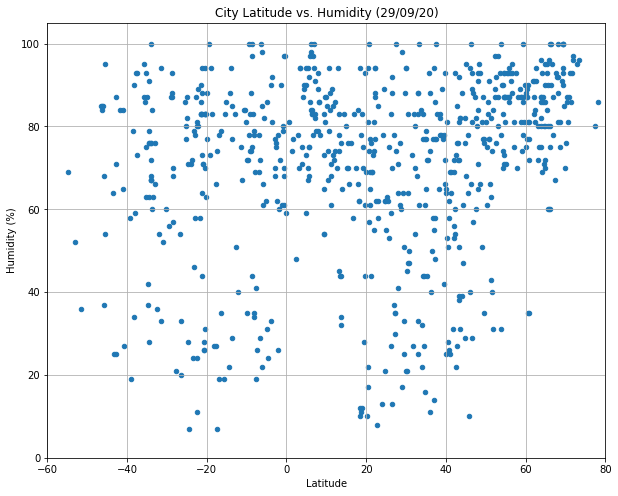

In [45]:
%matplotlib inline
city_data_df.plot.scatter(x="Lat", y="Humidity", xlim=(-60, 80), ylim=(0,105), grid=True, title="City Latitude vs. Humidity (29/09/20)", figsize=(10,8))

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("output_data/LatvsHumidity.png")
plt.show()

The above figure plots City Latitude vs Humidity (%). Humidity is a representation of how much moisture is in the air, it is the % that the air is saturated with water. 100% humidity indicates that the air has reached its capacity to hold water. There appears to be no correlation in the data.

## Latitude vs. Cloudiness Plot

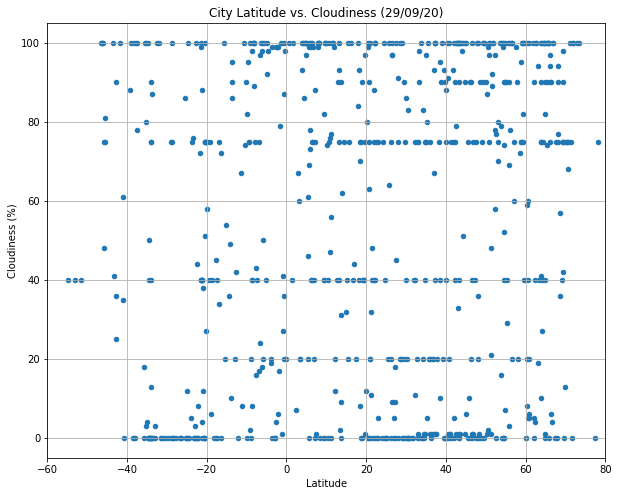

In [47]:
%matplotlib inline
city_data_df.plot.scatter(x="Lat", y="Cloudiness", xlim=(-60, 80), ylim=(-5,105), grid=True, title="City Latitude vs. Cloudiness (29/09/20)", figsize=(10,8))

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("output_data/LatvsCloudiness.png")
plt.show()

The above figure plots latitude of cities in the dataset with today's cloudiness (%). Cloudiness is a measure of how much cloud cover there is at a given location. There doesn't appear to be a relation between Cloudiness and Latitude.

## Latitude vs. Wind Speed Plot

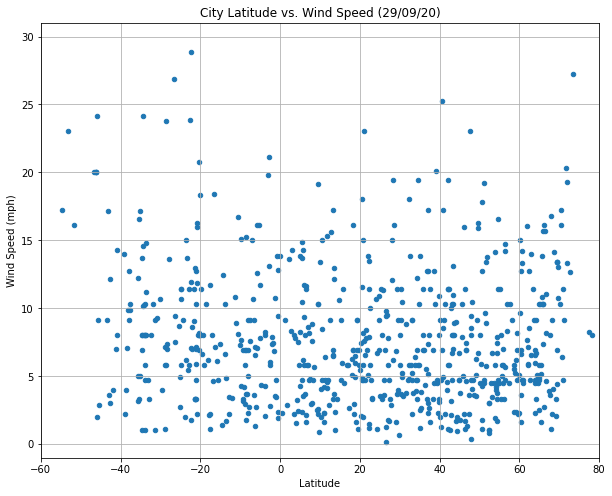

In [48]:
%matplotlib inline
city_data_df.plot.scatter(x="Lat", y="Wind Speed", xlim=(-60, 80), ylim=(-1,31), grid=True, title="City Latitude vs. Wind Speed (29/09/20)", figsize=(10,8))

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("output_data/LatvsWindSpeed.png")
plt.show()

The above figure plots wind latitude against wind speed (mph). There doesn't appear to be a relationship between the two variables.

## Linear Regression

In [14]:
# Split the DataFrame into two separate dataframes (one for north and one for south)

north_df = city_data_df[city_data_df["Lat"] > 0]

south_df = city_data_df[city_data_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8349921476142796
The r-squared value is: 0.697211886577507


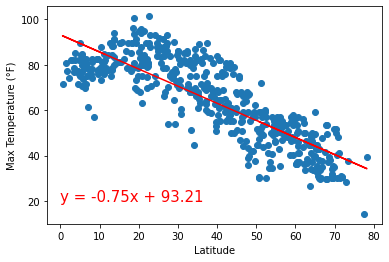

In [49]:
%matplotlib inline
# Convert to floats and store Latitude and Max Temp as x and y values
x_values = north_df["Lat"].astype("float")
y_values = north_df["Max Temp"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')

# Print r value
print(f"The r-value is: {rvalue}")

# Print r-squared value
print(f"The r-squared value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7619168857064417
The r-squared value is: 0.5805173407246029


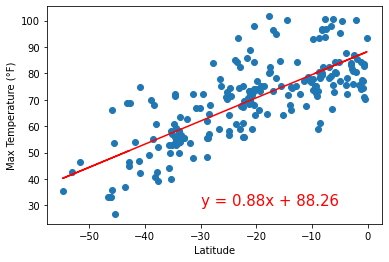

In [50]:
%matplotlib inline
# Convert to floats and store Latitude and Max Temp as x and y values
x_values = south_df["Lat"].astype("float")
y_values = south_df["Max Temp"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')

# Print r value
print(f"The r-value is: {rvalue}")

# Print r-squared value
print(f"The r-squared value is: {rvalue**2}")

# Show plot
plt.show()

The graphs above show that the r value for the northern hemisphere shows a stronger correlation (albeit negative) between latitute and max temperature than the southern hemisphere data.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.2085880595086325
The r-squared value is: 0.043508978569576806


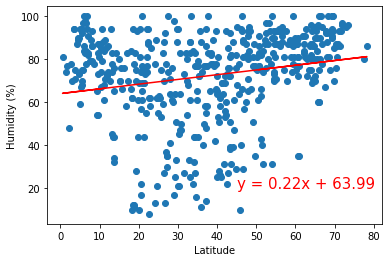

In [51]:
%matplotlib inline
# Convert to floats and store Latitude and Max Temp as x and y values
x_values = north_df["Lat"].astype("float")
y_values = north_df["Humidity"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Print r value
print(f"The r-value is: {rvalue}")

# Print r-squared value
print(f"The r-squared value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.025759594141287704
The r-squared value is: 0.0006635566903238638


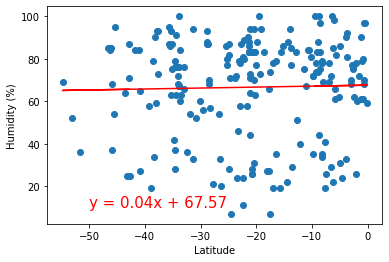

In [52]:
%matplotlib inline
# Convert to floats and store Latitude and Max Temp as x and y values
x_values = south_df["Lat"].astype("float")
y_values = south_df["Humidity"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Print r value
print(f"The r-value is: {rvalue}")

# Print r-squared value
print(f"The r-squared value is: {rvalue**2}")

# Show plot
plt.show()

Both the northern and southern hemisphere data show no correlation between latitude and humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.05961666500248293
The r-squared value is: 0.003554146746018273


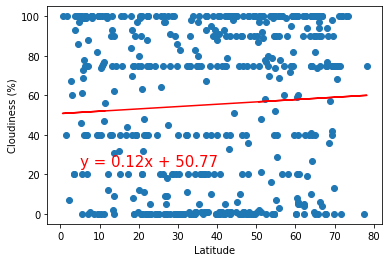

In [53]:
%matplotlib inline
# Convert to floats and store Latitude and Max Temp as x and y values
x_values = north_df["Lat"].astype("float")
y_values = north_df["Cloudiness"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,24),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Print r value
print(f"The r-value is: {rvalue}")

# Print r-squared value
print(f"The r-squared value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.060206324829618955
The r-squared value is: 0.003624801549489592


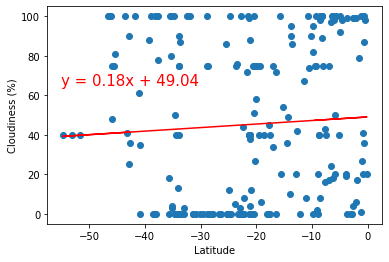

In [54]:
%matplotlib inline
# Convert to floats and store Latitude and Max Temp as x and y values
x_values = south_df["Lat"].astype("float")
y_values = south_df["Cloudiness"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,65),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Print r value
print(f"The r-value is: {rvalue}")

# Print r-squared value
print(f"The r-squared value is: {rvalue**2}")

# Show plot
plt.show()

Cloudiness shows almost no correlation with latitude in either hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.09574493486016576
The r-squared value is: 0.009167092551377385


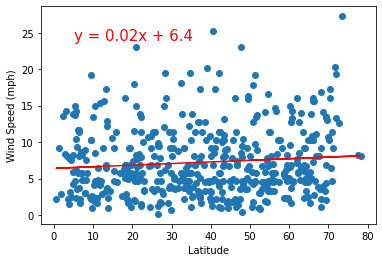

In [55]:
%matplotlib inline
# Convert to floats and store Latitude and Max Temp as x and y values
x_values = north_df["Lat"].astype("float")
y_values = north_df["Wind Speed"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,24),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Print r value
print(f"The r-value is: {rvalue}")

# Print r-squared value
print(f"The r-squared value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.21915285759441647
The r-squared value is: 0.04802797499179858


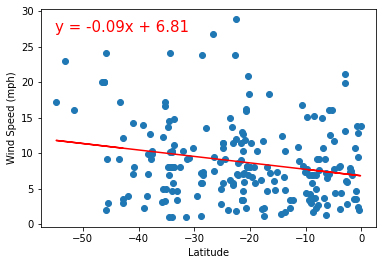

In [56]:
%matplotlib inline
# Convert to floats and store Latitude and Max Temp as x and y values
x_values = south_df["Lat"].astype("float")
y_values = south_df["Wind Speed"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,27),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Print r value
print(f"The r-value is: {rvalue}")

# Print r-squared value
print(f"The r-squared value is: {rvalue**2}")

# Show plot
plt.show()

Latitude and wind speed are not correlated for either hemisphere.